# **Basic Python**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [23]:
def F(n):
    for i in range(n):
        seq="".join(
            chr(65+ abs(j-i))
            for j in range(2*i+1)
        )
        final_seq="-" * (n-i-1) + seq + "-" * (n-i-1)
        print(final_seq + "\n")
    pass

# Tests
F(10)
F(6)

---------A---------

--------BAB--------

-------CBABC-------

------DCBABCD------

-----EDCBABCDE-----

----FEDCBABCDEF----

---GFEDCBABCDEFG---

--HGFEDCBABCDEFGH--

-IHGFEDCBABCDEFGHI-

JIHGFEDCBABCDEFGHIJ

-----A-----

----BAB----

---CBABC---

--DCBABCD--

-EDCBABCDE-

FEDCBABCDEF



## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [24]:
def F(d : dict):
    print("Sorted by keys ascending:")
    for key in sorted(d.keys()):
        x, y = d[key]
        print(f"-{key}-, -{x}-, -{y}-")
    
    print("\nSorted by x values descending:")
    for key in sorted(d.keys(), key=lambda k: d[k][0], reverse=True):
        x, y = d[key]
        print(f"-{key}-, -{x}-, -{y}-")
    
    print("\nSorted by y values ascending:")
    for key in sorted(d.keys(), key=lambda k: d[k][1]):
        x, y = d[key]
        print(f"-{key}-, -{x}-, -{y}-")

    pass

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

Sorted by keys ascending:
-1-, -1-, -2-
-2-, --1-, -4-
-4-, -2-, -3-
-5-, --4-, -3-

Sorted by x values descending:
-4-, -2-, -3-
-1-, -1-, -2-
-2-, --1-, -4-
-5-, --4-, -3-

Sorted by y values ascending:
-1-, -1-, -2-
-5-, --4-, -3-
-4-, -2-, -3-
-2-, --1-, -4-
Sorted by keys ascending:
--8-, -4-, -2-
-5-, -9-, --10-
-6-, --3-, -4-
-7-, -2-, -1-

Sorted by x values descending:
-5-, -9-, --10-
--8-, -4-, -2-
-7-, -2-, -1-
-6-, --3-, -4-

Sorted by y values ascending:
-5-, -9-, --10-
-7-, -2-, -1-
--8-, -4-, -2-
-6-, --3-, -4-


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [68]:
#TODO
file_path = "/Users/anousha_puvvala/Downloads/student_records.csv"
with open(file_path, 'r') as file:
    next(file)
    for i, line in enumerate(file):
        fields = line.strip().split(',')
        roll_number, department, credit, course_name, course_type, grade = fields
        print(f"{roll_number} {department} {credit} {course_name} {course_type} {grade}")
        if i == 9:
            break


588946 MA 3 EC250 hasmed_elective AB
145372 EP 4 EP407 hasmed_elective CC
834515 MA 8 EP885 hasmed_elective BB
344265 CSE 6 CSE699 honours AB
358405 MA 3 EE460 minor AP
781075 CE 8 CE540 honours CC
180828 CSE 6 CE880 minor AB
981238 MM 4 CSE226 minor AB
836881 MM 8 MM530 core AA
310604 EE 8 EE202 core AB


#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=9, BC=7, CC=6)

In [49]:
#TODO
grade_to_points = {
    'AP': 10, 'AA': 10,
    'AB': 9, 'BB': 8,
    'BC': 7, 'CC': 6
}
file_path = "/Users/anousha_puvvala/Downloads/student_records.csv"
student_data = {}
with open(file_path, 'r') as file:
    next(file) # skip the header
    
    for line in file:
        fields = line.strip().split(',')
        roll_number, department, credit, course_name, course_type, grade = fields
        credit = int(credit)
        grade_points = grade_to_points.get(grade, 0) 

        if roll_number not in student_data:
            student_data[roll_number] = {
                'TotalCredits': 0,
                'WeightedPoints': 0,
            }  #if initial data of student isnt present

        student_data[roll_number]['TotalCredits'] += credit
        student_data[roll_number]['WeightedPoints'] += credit * grade_points

print(f"{'Roll Number':<15} {'Total Credits':<15} {'CPI':<5}")
for roll_number, data in student_data.items():
    total_credits = data['TotalCredits']
    weighted_points = data['WeightedPoints']
    cpi = weighted_points / total_credits if total_credits > 0 else 0
    print(f"{roll_number:<15} {total_credits:<15} {cpi:.2f}")




Roll Number     Total Credits   CPI  
588946          199             8.69
145372          173             7.75
834515          199             8.22
344265          153             8.70
358405          206             8.59
781075          246             8.17
180828          177             8.10
981238          168             8.24
836881          246             8.39
310604          198             8.33
847809          261             8.21
773982          264             8.07
500658          208             8.17
810863          192             8.15
124663          229             8.13
364146          225             8.40
871746          216             8.21
270007          241             8.03
597353          200             8.12
986057          199             8.07
718510          184             8.43
836431          160             7.90
379479          260             8.25
582912          221             8.66
788020          193             8.02
613401          209             8.44


#### 2.c: Print out the names of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [57]:
#TODO
file_path = "/Users/anousha_puvvala/Downloads/student_records.csv"
student_data = {}
with open(file_path, 'r') as file:
    next(file)

    for line in file:
        fields = line.strip().split(',')
        roll_number, department, credit, course_name, course_type, grade = fields
        credit = int(credit)

        if roll_number not in student_data:
            student_data[roll_number] = {
                'Credits': {'core': 0, 'department_elective': 0, 'felxible_elective': 0, 'hasmed_elective': 0}
            }

        if course_type in student_data[roll_number]['Credits']:
            student_data[roll_number]['Credits'][course_type] += credit

required_credits = {
    'core': 20,
    'department_elective': 15,
    'felxible_elective': 10,
    'hasmed_elective': 5
}

print("Students meeting graduation requirements:")
for roll_number, data in student_data.items():
    credits = data['Credits']
    meets_requirements = all(credits[course_type] >= required_credits[course_type] for course_type in required_credits)

    if meets_requirements:
        print(roll_number)



Students meeting graduation requirements:
588946
834515
781075
180828
981238
836881
310604
773982
500658
810863
124663
871746
986057
379479
144528
485484
845623
150503
214270
517837
482623
721490
955757
143856
571782
973158
703403
960395
521087
461971
879634
716985
265922
283796
203200
327122
534763
391848
971123
207443
488661
782129
928288
581858
282482
572815
608952
628849
630568
388969
159438
970791
143142
998293
681499
888886
608522
362471
692318
626000
581065
787967
381227
750259
881983
294697


#### 2.d: Print out the names of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [63]:
#TODO
file_path = "/Users/anousha_puvvala/Downloads/student_records.csv"
student_data_minor = {}

with open(file_path, 'r') as file:
    next(file)

    for line in file:
        fields = line.strip().split(',')
        roll_number, department, credit, course_name, course_type, grade = fields
        credit = int(credit)

        if course_type == 'minor': 
            if roll_number not in student_data_minor:
                student_data_minor[roll_number] = {
                    'Department': department,
                    'MinorCredits': 0
                }
            if department == student_data_minor[roll_number]['Department']:
                student_data_minor[roll_number]['MinorCredits'] += credit

print("Students who completed a minor :")
for roll_number, data in student_data_minor.items():
    if data['MinorCredits'] >= 10:
        print(f"{roll_number}")


    

Students who completed a minor :
358405
180828
981238
847809
270007
781075
986057
124663
364146
517837
721490
150503
571782
716985
194063
265922
482623
329535
207443
810863
973158
143142
970791
907454
888886
608522
608952
143856
773982
960395
283796
461584
879634
597353
845623
465496
718510
534763
680096
836881
787967
344265
581858
391848
485484
775967
138296
381526
681499
816041
971123
199713
630568
379479
362471
703403
388969
836431
582912
381227
478606
159438
733782
782129
144528
851029
881983
458200
998293
628849
995208
613401
301135
500658
488661
788020
626000
955757
841365
750259
572815
521087
214270
461971
692318
145372
588946
834515
208100
871746
327122
581065
203200
294697
993835
282482


#### 2.e: Print out the names of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [62]:
#TODO
file_path = "student_records.csv"
student_data_honours = {}

with open(file_path, 'r') as file:
    next(file)

    for line in file:
        fields = line.strip().split(',')
        roll_number, department, credit, course_name, course_type, grade = fields
        credit = int(credit)

        if roll_number not in student_data_honours:
            student_data_honours[roll_number] = {
                'HonoursCredits': 0,
                'CoreCredits': 0
            }

        if course_type == 'honours':
            student_data_honours[roll_number]['HonoursCredits'] += credit
        
        if course_type == 'core':
            student_data_honours[roll_number]['CoreCredits'] += credit

print("Students who completed honours :")
for roll_number, data in student_data_honours.items():
    if data['HonoursCredits'] >= 10 and data['CoreCredits'] >= 20:
        print(f"{roll_number}")



Students who completed honours :
588946
145372
834515
781075
836881
310604
773982
500658
810863
124663
364146
871746
986057
718510
379479
582912
788020
613401
144528
485484
199713
845623
150503
214270
517837
482623
721490
955757
589528
143856
571782
973158
703403
960395
521087
461971
879634
716985
265922
283796
203200
327122
534763
391848
971123
207443
488661
782129
928288
581858
282482
572815
608952
628849
630568
388969
159438
870642
970791
143142
998293
681499
888886
608522
362471
465496
208100
692318
626000
458200
581065
787967
750259
881983
294697


# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [30]:
#TODO
import numpy as np
from scipy.optimize import minimize

def objective(var):
    x, y = var
    return 2 * (x - y - 3)**2 + 4 * (x + 2*y + 1)**4

def linear_constraint(var):
    x, y = var
    return x - y + 3

def nonlinear_constraint(var):
    x, y = var
    return 5 - ((x + 2)**2 + (y + 1)**2)

initial_guess = [0, 0]

constraints = [
    {'type': 'ineq', 'fun': linear_constraint},   
    {'type': 'ineq', 'fun': nonlinear_constraint} 
]

result = minimize(objective, initial_guess, constraints=constraints, method='SLSQP')

if result.success:
    print("Optimal solution found:")
    print(f"x = {result.x[0]:.4f}, y = {result.x[1]:.4f}")
    print(f"Minimum value of f(x, y) = {result.fun:.4f}")
else:
    print("Optimization failed:", result.message)


Optimal solution found:
x = 0.2349, y = -0.9285
Minimum value of f(x, y) = 7.3450


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [31]:
#TODO
import numpy as np
from scipy.integrate import quad

def f(t):
    x = np.sqrt(3) * np.cos(t)
    y = np.sqrt(3) * np.sin(t)
    return np.sqrt(3) * (x**2 + y**4)

result, error = quad(f, 0, 2 * np.pi)

print(f"Line integral result: {result:.6f}")
print(f"Estimated error: {error:.6e}")


Line integral result: 53.053631
Estimated error: 5.376845e-09


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [32]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [33]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
import numpy as np
def load_data(data_path):
    try:
        coordinates = np.loadtxt(data_path, delimiter=',')
        return coordinates
    except Exception as e:
        print(f"An error occurred while loading the file: {e}")
        return None
file_path=('/Users/anousha_puvvala/Downloads/spice_locations.txt')
load_data(file_path)

array([[-2.12729941e+00,  1.75357153e+00],
       [-3.40030291e-01, -6.70757901e-03],
       [-3.21990680e+00, -2.22002740e+00],
       [-3.70958194e+00,  1.33088073e+00],
       [-9.94424941e-01,  5.40362889e-01],
       [-3.89707753e+00,  1.84954926e+00],
       [ 1.62213204e-01, -1.93830445e+00],
       [-3.09087516e+00, -2.08297745e+00],
       [-2.47878879e+00, -3.76217842e-01],
       [-1.84027491e+00, -1.54385430e+00],
       [-9.40735526e-01, -2.30253070e+00],
       [-2.53927676e+00, -1.16819078e+00],
       [-1.71965008e+00,  9.25879807e-01],
       [-3.00163109e+00, -4.28827808e-01],
       [-1.03792716e+00, -2.76774794e+00],
       [-9.62275740e-01, -2.14737938e+00],
       [-3.67474204e+00,  1.74442769e+00],
       [ 8.28160165e-01,  1.04198674e+00],
       [-2.47693115e+00, -2.51163943e+00],
       [-5.78834867e-01, -7.99237531e-01],
       [-3.38980883e+00, -5.24115449e-01],
       [-3.82805739e+00,  1.54660201e+00],
       [-2.70610009e+00,  3.12611422e-01],
       [-2.

In [34]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
import numpy as np

def initialize_centers(data, K, init_centers=None):
    if init_centers is None:
        indices = np.random.choice(data.shape[0], size=K, replace=False)
        centers = data[indices]
        return centers
    else:
        centers = init_centers
        return centers
    
k=2
centers=initialize_centers(load_data(file_path),k)
print(centers)


[[ 2.02761059  7.07730714]
 [-0.99442494  0.54036289]]


In [35]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
import numpy as np

def initialize_labels(data):
    N = data.shape[0]  
    labels = np.ones(N)  
    return labels
initialize_labels(load_data(file_path))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [36]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
import numpy as np

def compute_distances(data, centers):
    N = data.shape[0] 
    K = centers.shape[0] 
    distances = np.zeros((N, K))  
    for i in range(N):
        for j in range(K):
            distances[i, j] = np.linalg.norm(data[i] - centers[j])
    return distances
distances=compute_distances(load_data(file_path),centers)
print(distances)


[[ 6.75317984  1.65990354]
 [ 7.46920263  0.85294692]
 [10.67599495  3.54577552]
 [ 8.12014745  2.82789603]
 [ 7.20169     0.        ]
 [ 7.90135316  3.18423633]
 [ 9.20657155  2.73525201]
 [10.49331741  3.35812717]
 [ 8.70991791  1.74455045]
 [ 9.44907206  2.24931622]
 [ 9.83831472  2.84340052]
 [ 9.42574645  2.30341546]
 [ 7.20291752  0.82132502]
 [ 9.03522737  2.22894754]
 [10.31128659  3.30839684]
 [ 9.69712647  2.68793454]
 [ 7.80745981  2.93834507]
 [ 6.15335467  1.89035525]
 [10.59428113  3.39301383]
 [ 8.29659652  1.4025849 ]
 [ 9.33434832  2.62125506]
 [ 8.05465994  3.0069902 ]
 [ 8.25645959  1.72676071]
 [ 8.71076865  1.72554594]
 [ 9.72773731  2.63019523]
 [ 6.31284711  1.87261137]
 [ 5.75888241  1.9324921 ]
 [ 6.255273    1.06912914]
 [10.67503795  3.62290531]
 [10.25039904  3.37454733]
 [ 3.3274096   6.24073353]
 [ 4.71194414  8.30416313]
 [ 1.93812357  6.79067034]
 [ 0.68025136  7.4533141 ]
 [ 0.92400815  8.12466531]
 [ 4.91995666  7.67623721]
 [ 0.          7.20169   ]
 

In [37]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    try:
        labels = np.argmin(distances, axis=1)
        return labels
    except Exception as e:
        return None
labels=update_labels(distances)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [38]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
import numpy as np

def update_centers(data, labels, K):
    updated_centers = np.zeros((K, 2))  
    try:
        for k in range(K):
            assigned_points = data[labels == k]
            if len(assigned_points) > 0:
                updated_centers[k] = np.mean(assigned_points, axis=0)
                return updated_centers
    except Exception as e:
        return None
updated_centers=update_centers(load_data(file_path),labels,2)
print(updated_centers)

[[4.51518371 5.35201025]
 [0.         0.        ]]


In [43]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    try:
        return (np.array_equal(labels, updated_labels))
    except Exception as e:
        return None
updated_labels=update_labels(compute_distances(load_data(file_path),updated_centers))
check_termination(labels, updated_labels)

False

In [40]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
import time
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialize_centers(data, K, init_centers)
    labels = initialize_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = compute_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

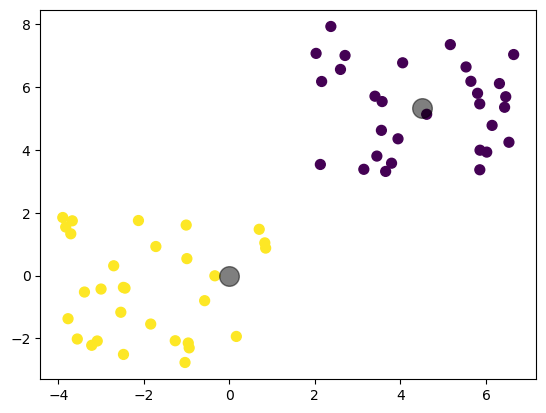

In [41]:
### TODO 7
import matplotlib.pyplot as plt
def visualise(data_path, labels, centers):
    data = load_data(data_path)
    centers = update_centers(load_data(file_path),updated_labels,2)
    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set title as 'K-means clustering'

    ### Set xlabel as 'Longitude'

    ### Set ylabel as 'Latitude'

    ### Save the plot as 'kmeans.png'


    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt
visualise(file_path, updated_labels, updated_centers)

Time taken for the algorithm to converge: 0.0011317729949951172


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

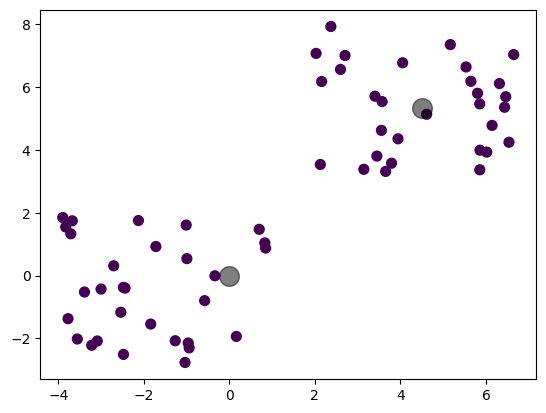

In [42]:
### After you have completed the above functions, run the following code to generate the plot
data_path = file_path
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)